<a href="https://colab.research.google.com/github/hmezer/dai-project/blob/main/model_test_past_vs_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Setup

In [1]:
!git clone https://github.com/hmezer/dai-project

Cloning into 'dai-project'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 230 (delta 35), reused 4 (delta 4), pack-reused 150 (from 1)
Receiving objects: 100% (230/230), 128.57 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [2]:
# extract the zip content at dai-project/data/nasdaq-sentiment.zip
!unzip -o dai-project/models/models_past_vs_sentiment.zip -d models-past-vs-sentiment/

Archive:  dai-project/models/models_past_vs_sentiment.zip
  inflating: models-past-vs-sentiment/future_1D_Return_log__base.txt  
  inflating: models-past-vs-sentiment/future_1D_Return_log__sentiment-only.txt  
  inflating: models-past-vs-sentiment/future_1M_momentum__base.txt  
  inflating: models-past-vs-sentiment/future_1M_momentum__sentiment-only.txt  
  inflating: models-past-vs-sentiment/future_1M_Return_CUML_log__base.txt  
  inflating: models-past-vs-sentiment/future_1M_Return_CUML_log__sentiment-only.txt  
  inflating: models-past-vs-sentiment/future_1M_volatility__base.txt  
  inflating: models-past-vs-sentiment/future_1M_volatility__sentiment-only.txt  
  inflating: models-past-vs-sentiment/future_1W_momentum__base.txt  
  inflating: models-past-vs-sentiment/future_1W_momentum__sentiment-only.txt  
  inflating: models-past-vs-sentiment/future_1W_Return_CUML_log__base.txt  
  inflating: models-past-vs-sentiment/future_1W_Return_CUML_log__sentiment-only.txt  
  inflating: model

In [ ]:
import os
import lightgbm as lgb

model_dir = 'models-past-vs-sentiment/'
model_files = os.listdir(model_dir)

models = {}
for model_file in model_files:
    model_path = os.path.join(model_dir, model_file)
    # Extract target name and excluded feature from the file name
    model_name = os.path.splitext(model_file)[0]
    parts = model_name.replace('model_', '').split('_exclude_')

    if len(parts) > 1:
        target_name = '_'.join(parts[:-1])
        excluded_feature = parts[-1]
    else:
        target_name = model_name.replace('model_', '').replace('_all_features', '')
        excluded_feature = "baseline" # Use "baseline" for models with all features

    try:
        if target_name not in models:
            models[target_name] = {}
        models[target_name][excluded_feature] = lgb.Booster(model_file=model_path)
        print(f"Loaded model for target '{target_name}' with excluded feature '{excluded_feature}'")
    except Exception as e:
        print(f"Error loading model {model_name}: {e}")

print(f"\nTotal models loaded: {sum(len(target_models) for target_models in models.values())}")

Loaded model for target 'future_1W_momentum' with excluded feature 'past_1D_direction'
Loaded model for target 'future_1W_Return_CUML_log' with excluded feature 'past_1M_direction'
Loaded model for target 'future_1M_momentum' with excluded feature 'past_1W_drawdown'
Loaded model for target 'future_1M_momentum' with excluded feature 'Polarity_pure'
Loaded model for target 'future_1M_momentum' with excluded feature 'past_1M_volatility'
Loaded model for target 'future_1D_Return_log' with excluded feature 'past_1W_drawdown'
Loaded model for target 'future_1W_momentum' with excluded feature 'past_1W_momentum'
Loaded model for target 'future_1M_Return_CUML_log' with excluded feature 'past_1M_direction'
Loaded model for target 'future_1W_Return_CUML_log' with excluded feature 'past_1W_max_gain'
Loaded model for target 'future_1W_Return_CUML_log' with excluded feature 'past_1M_Return_COMP_log'
Loaded model for target 'future_1M_Return_CUML_log' with excluded feature 'Polarity_pure'
Loaded mode

In [3]:
import os
import lightgbm as lgb

model_dir = 'models-past-vs-sentiment/'
model_files = [f for f in os.listdir(model_dir) if f.endswith('.txt')]

models = {}

for model_file in model_files:
    model_path = os.path.join(model_dir, model_file)
    # Remove extension and split name into target and type
    model_name = os.path.splitext(model_file)[0]
    # Expected format: '{model_target}__base' or '{model_target}__sentiment-only'
    if '__' in model_name:
        target_name, model_type = model_name.split('__', 1)
    else:
        print(f"Skipping file with unexpected name: {model_file}")
        continue

    try:
        if target_name not in models:
            models[target_name] = {}
        models[target_name][model_type] = lgb.Booster(model_file=model_path)
        print(f"Loaded model for target '{target_name}' type '{model_type}'")
    except Exception as e:
        print(f"Error loading model {model_file}: {e}")

total_loaded = sum(len(target_models) for target_models in models.values())
print(f"\nTotal models loaded: {total_loaded}")

Loaded model for target 'future_1M_volatility' type 'base'
Loaded model for target 'future_1M_Return_CUML_log' type 'sentiment-only'
Loaded model for target 'future_1M_volatility' type 'sentiment-only'
Loaded model for target 'future_1M_Return_CUML_log' type 'base'
Loaded model for target 'future_1M_momentum' type 'base'
Loaded model for target 'future_1W_momentum' type 'sentiment-only'
Loaded model for target 'future_1W_Return_CUML_log' type 'base'
Loaded model for target 'future_1W_momentum' type 'base'
Loaded model for target 'future_1D_Return_log' type 'base'
Loaded model for target 'future_1M_momentum' type 'sentiment-only'
Loaded model for target 'future_1D_Return_log' type 'sentiment-only'
Loaded model for target 'future_1W_volatility' type 'sentiment-only'
Loaded model for target 'future_1W_Return_CUML_log' type 'sentiment-only'
Loaded model for target 'future_1W_volatility' type 'base'

Total models loaded: 14


In [10]:
models["future_1M_volatility"]["sentiment-only"].feature_name()

['Polarity_diluted', 'Polarity_pure', 'Polarity_immediate']

In [4]:
import pandas as pd

# import csv as test_set
test_set = pd.read_csv('dai-project/data/test_set.csv')
test_set = test_set.dropna()
print(test_set.info())
print(test_set.head())

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 1 to 972
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 949 non-null    int64  
 1   Date                       949 non-null    object 
 2   Open                       949 non-null    float64
 3   High                       949 non-null    float64
 4   Low                        949 non-null    float64
 5   Close                      949 non-null    float64
 6   Volume                     949 non-null    int64  
 7   OpenAdjusted               949 non-null    float64
 8   HighAdjusted               949 non-null    float64
 9   LowAdjusted                949 non-null    float64
 10  CloseAdjusted              949 non-null    float64
 11  VolumeAdjusted             949 non-null    int64  
 12  future_1D_Return_log       949 non-null    float64
 13  future_1W_Return_CUML_log  949 non-null    float64
 14 

In [5]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd

# model: your loaded LightGBM model (can be Booster, LGBMClassifier, LGBMRegressor)
# X_test: your test set (as DataFrame), used for feature names

def show_feature_importance(model, X_test):
    # Get feature names
    feature_names = X_test.columns if hasattr(X_test, 'columns') else [f'feature_{i}' for i in range(X_test.shape[1])]

    # Get importance values
    importance_gain = model.feature_importances_ if hasattr(model, 'feature_importances_') else model.feature_importance(importance_type='gain')
    importance_split = model.feature_importance(importance_type='split') if hasattr(model, 'feature_importance') else None

    # Create DataFrame for gain
    df_gain = pd.DataFrame({
        'feature': feature_names,
        'importance_gain': importance_gain
    }).sort_values(by='importance_gain', ascending=False)

    print("Feature importance (gain):")
    print(df_gain)

    # Color bins red if "Polarity" in feature name, else blue
    colors_gain = ['red' if 'Polarity' in feat else 'blue' for feat in df_gain['feature']]

    # Plot importance (gain)
    plt.figure(figsize=(8, 6))
    plt.barh(df_gain['feature'], df_gain['importance_gain'], color=colors_gain)
    plt.xlabel('Importance (gain)')
    plt.title('Feature Importance (Gain)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # If split importance available, print and optionally plot
    if importance_split is not None:
        df_split = pd.DataFrame({
            'feature': feature_names,
            'importance_split': importance_split
        }).sort_values(by='importance_split', ascending=False)

        print("\nFeature importance (split):")
        print(df_split)

        # Color bins red if "Polarity" in feature name, else blue
        colors_split = ['red' if 'Polarity' in feat else 'blue' for feat in df_split['feature']]

        plt.figure(figsize=(8, 6))
        plt.barh(df_split['feature'], df_split['importance_split'], color=colors_split)
        plt.xlabel('Importance (split)')
        plt.title('Feature Importance (Split)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

# Usage example:
# show_feature_importance(model, X_test)

Feature importance (gain):
                    feature  importance_gain
6        past_1M_volatility        28.706250
5        past_1W_volatility         2.954532
12         past_1M_max_gain         2.644848
11         past_1W_max_gain         1.695964
0        past_1D_Return_log         1.260486
4   past_1M_Return_COMP_log         1.034116
10         past_1M_drawdown         0.932180
8          past_1M_momentum         0.760575
9          past_1W_drawdown         0.691529
7          past_1W_momentum         0.535289
2   past_1M_Return_CUML_log         0.532995
3   past_1W_Return_COMP_log         0.525774
1   past_1W_Return_CUML_log         0.508673
13        past_1D_direction         0.000000
14        past_1W_direction         0.000000
15        past_1M_direction         0.000000


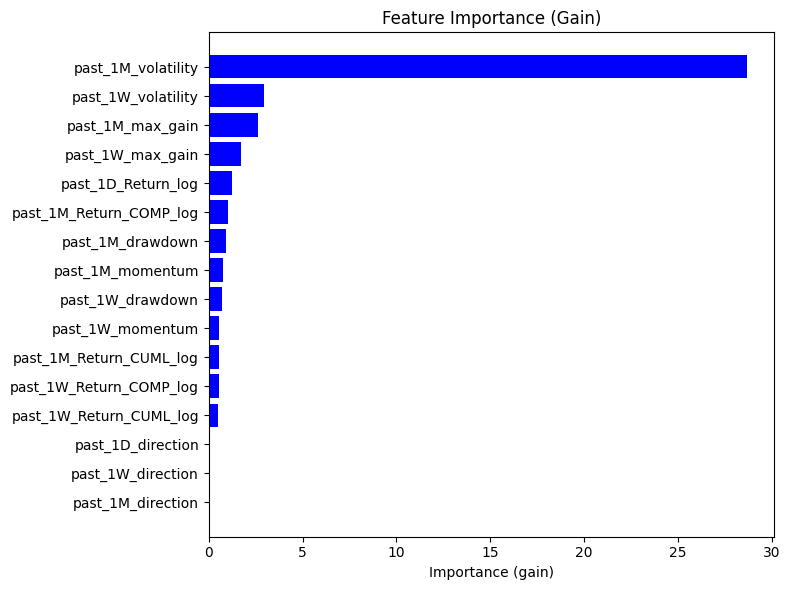


Feature importance (split):
                    feature  importance_split
6        past_1M_volatility               817
5        past_1W_volatility               813
0        past_1D_Return_log               590
12         past_1M_max_gain               515
10         past_1M_drawdown               474
11         past_1W_max_gain               440
9          past_1W_drawdown               376
8          past_1M_momentum               326
4   past_1M_Return_COMP_log               303
7          past_1W_momentum               286
3   past_1W_Return_COMP_log               270
1   past_1W_Return_CUML_log               245
2   past_1M_Return_CUML_log               234
13        past_1D_direction                 0
14        past_1W_direction                 0
15        past_1M_direction                 0


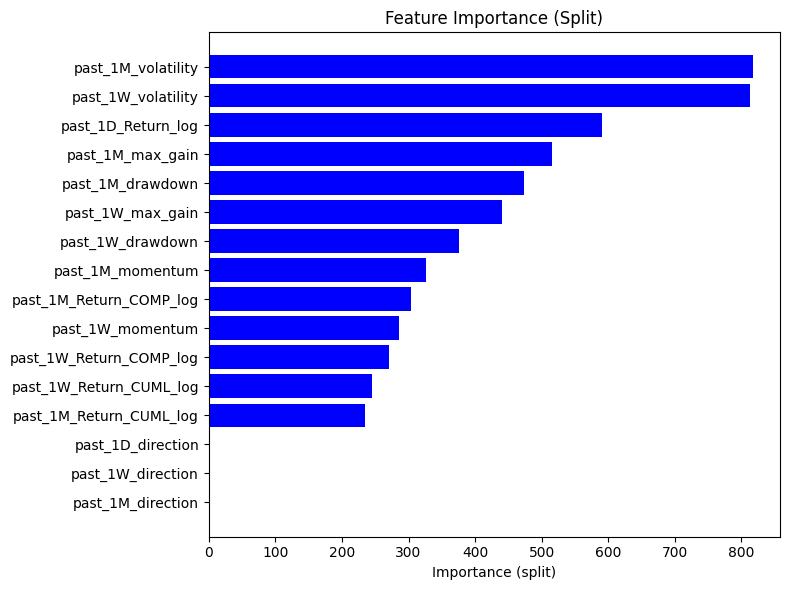

In [11]:
model = models['future_1M_volatility']['base']
show_feature_importance(model, test_set[[col for col in model.feature_name()]])

Feature importance (gain):
              feature  importance_gain
1       Polarity_pure         2.541418
0    Polarity_diluted         1.837756
2  Polarity_immediate         0.386544


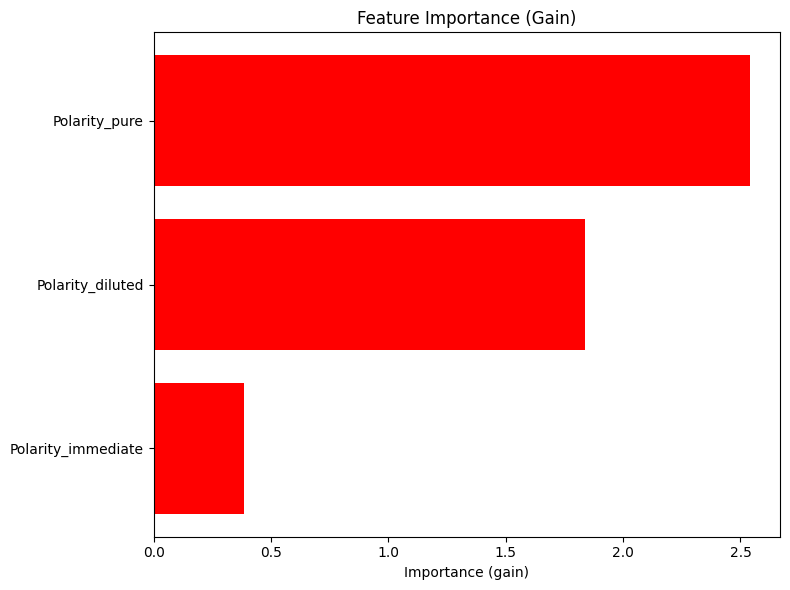


Feature importance (split):
              feature  importance_split
0    Polarity_diluted              2650
1       Polarity_pure              2456
2  Polarity_immediate               418


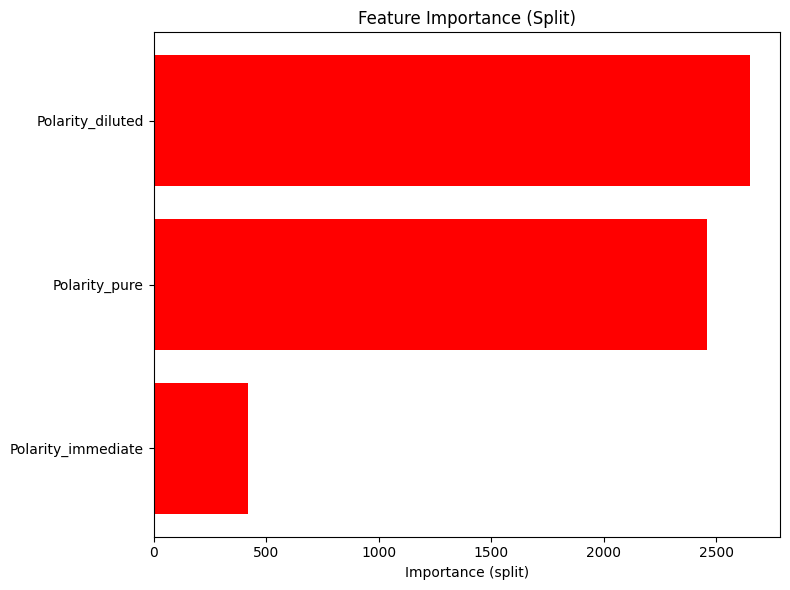

In [13]:
model = models['future_1M_volatility']['sentiment-only']
show_feature_importance(model, test_set[[col for col in model.feature_name()]])

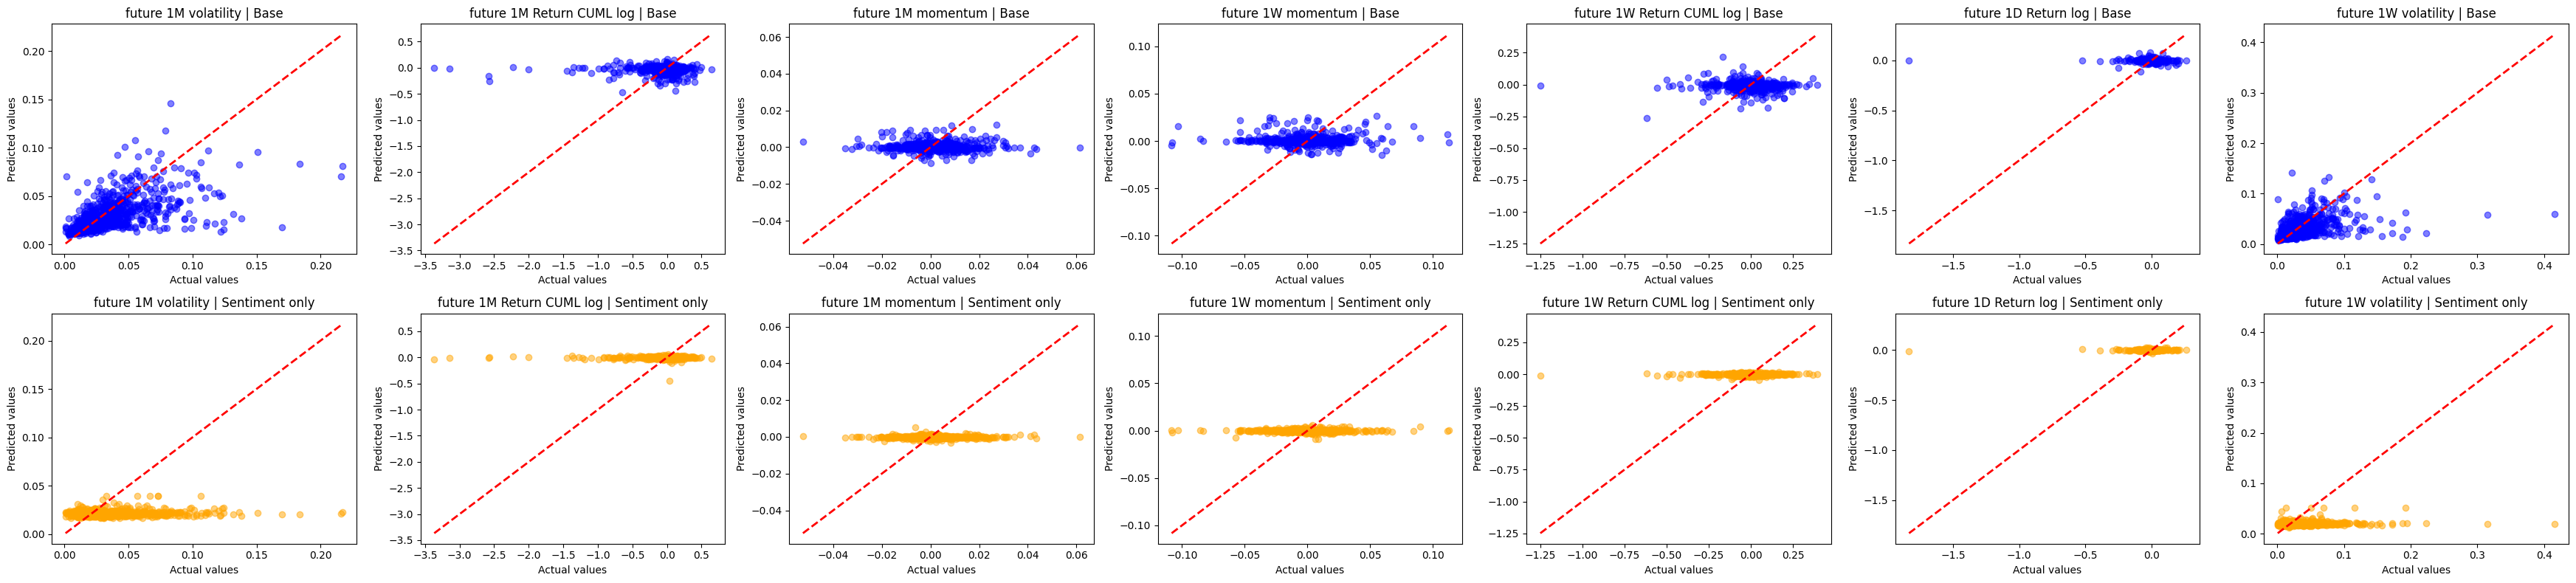

In [29]:
import matplotlib.pyplot as plt

targets = list(models.keys())
n_targets = len(targets)
model_types = ['base', 'sentiment-only']

fig, axes = plt.subplots(2, n_targets, figsize=(5 * n_targets, 8), squeeze=False)

for col_idx, target in enumerate(targets):
    y_test = test_set[target]
    for row_idx, model_type in enumerate(model_types):
        ax = axes[row_idx][col_idx]
        model = models[target][model_type]
        X_test = test_set[model.feature_name()]
        y_pred = model.predict(X_test)
        ax.scatter(y_test, y_pred, alpha=0.5, color='blue' if model_type == 'base' else 'orange')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        ax.set_xlabel('Actual values')
        ax.set_ylabel('Predicted values')
        ax.set_title(f"{target.replace('_', ' ')} | {model_type.replace('-', ' ').capitalize()}")

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

def build_metrics_dict(models_dict, df):
    metrics_dict = {}
    all_features = set(df.columns)
    # Remove targets from features for lookup convenience
    all_targets = set(models_dict.keys())
    feature_candidates = all_features - all_targets
    for target, exclude_dict in models_dict.items():
        metrics_dict[target] = {}
        for excluded_feature, booster in exclude_dict.items():
            # Features: all except target and excluded_feature
            X_test = df[booster.feature_name()]
            y_test = df[target]
            # Evaluate
            metrics = evaluate_regression(booster, X_test, y_test)
            metrics_dict[target][excluded_feature] = metrics
    return metrics_dict

# Usage:
# metrics_dict = build_metrics_dict(models_dict, df)

In [18]:
metrics_dict = build_metrics_dict(models, test_set)

In [25]:
import pandas as pd

def nested_scores_to_df(scores_dict):
    rows = []
    for target, excluded_dict in scores_dict.items():
        for excluded_feature, metrics in excluded_dict.items():
            row = {'target': target, 'excluded_feature': excluded_feature}
            row.update(metrics)
            rows.append(row)
    return pd.DataFrame(rows)

# Usage
df_scores = nested_scores_to_df(metrics_dict)
print(df_scores)

# Optional: see in Jupyter with sorting, styling, etc.
# display(df_scores.sort_values(['target', 'R2'], ascending=[True, False])
#         .style.background_gradient(subset=['R2'], cmap='RdYlGn'))

                       target excluded_feature       MSE      RMSE       MAE  \
0        future_1M_volatility             base  0.000463  0.021511  0.012580   
1        future_1M_volatility   sentiment-only  0.000821  0.028649  0.017913   
2   future_1M_Return_CUML_log   sentiment-only  0.089120  0.298529  0.138638   
3   future_1M_Return_CUML_log             base  0.089095  0.298489  0.144811   
4          future_1M_momentum             base  0.000086  0.009294  0.006064   
5          future_1M_momentum   sentiment-only  0.000083  0.009134  0.005948   
6          future_1W_momentum   sentiment-only  0.000355  0.018851  0.011937   
7          future_1W_momentum             base  0.000373  0.019308  0.012179   
8   future_1W_Return_CUML_log             base  0.011592  0.107664  0.065987   
9   future_1W_Return_CUML_log   sentiment-only  0.010776  0.103807  0.062736   
10       future_1D_Return_log             base  0.006213  0.078821  0.031274   
11       future_1D_Return_log   sentimen